In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
cd ../

c:\Users\bhavy\Desktop\learnsphere-hackomania\backend


In [3]:
# Load dataset
study_data = pd.read_csv("data/xAPI-Edu-Data.csv")  # Assuming your dataset file

In [4]:
study_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
# Describe data
study_data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
study_data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [7]:
# Rename columns
study_data.rename(columns={
    "gender": "Gender",
    "NationalITy": "Nationality",
    "PlaceofBirth": "Birthplace",
    "StageID": "Education_Level",
    "GradeID": "Grade",
    "SectionID": "Section",
    "Topic": "Subject",
    "Semester": "Semester",
    "Relation": "Guardian",
    "raisedhands": "HandsRaised",
    "VisITedResources": "ResourcesVisited",
    "AnnouncementsView": "AnnouncementsViewed",
    "Discussion": "DiscussionPosts",
    "ParentAnsweringSurvey": "ParentSurvey",
    "ParentschoolSatisfaction": "ParentSatisfaction",
    "StudentAbsenceDays": "AbsenceDays_lessThan7",
    "Class": "Performance"
}, inplace=True)

# Standardize categorical values
study_data["Education_Level"] = study_data["Education_Level"].replace({
    "lowerlevel": "Lower Level",
    "MiddleSchool": "Middle School",
    "HighSchool": "High School"
})

study_data["Semester"] = study_data["Semester"].replace({
    "F": "First",
    "S": "Second"
})

study_data["ParentSurvey"] = study_data["ParentSurvey"].replace({
    "Yes": "Yes",
    "No": "No"
})

study_data["ParentSatisfaction"] = study_data["ParentSatisfaction"].replace({
    "Good": "Satisfied",
    "Bad": "Unsatisfied"
})

study_data["AbsenceDays_lessThan7"] = study_data["AbsenceDays_lessThan7"].replace({
    "Under-7": "Yes",
    "Above-7": "No"
})

study_data['Grade'] = study_data['Grade'].replace({
    'G-01': '1',
    'G-02': '2',
    'G-03': '3',
    'G-04': '4',
    'G-05': '5',
    'G-06': '6',
    'G-07': '7',
    'G-08': '8',
    'G-09': '9',
    'G-10': '10',
    'G-11': '11',
    'G-12': '12'
})

In [8]:
study_data.columns

Index(['Gender', 'Nationality', 'Birthplace', 'Education_Level', 'Grade',
       'Section', 'Subject', 'Semester', 'Guardian', 'HandsRaised',
       'ResourcesVisited', 'AnnouncementsViewed', 'DiscussionPosts',
       'ParentSurvey', 'ParentSatisfaction', 'AbsenceDays_lessThan7',
       'Performance'],
      dtype='object')

In [9]:
study_data["AbsenceDays_lessThan7"].value_counts()

AbsenceDays_lessThan7
Yes    289
No     191
Name: count, dtype: int64

In [10]:
# summarize the data
study_data.describe(include='all')

,Gender,Nationality,Birthplace,Education_Level,Grade,Section,Subject,Semester,Guardian,HandsRaised,ResourcesVisited,AnnouncementsViewed,DiscussionPosts,ParentSurvey,ParentSatisfaction,AbsenceDays_lessThan7,Performance
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,Middle School,2,A,IT,First,Father,NaN,NaN,NaN,NaN,Yes,Satisfied,Yes,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [11]:
study_data.head()

,Gender,Nationality,Birthplace,Education_Level,Grade,Section,Subject,Semester,Guardian,HandsRaised,ResourcesVisited,AnnouncementsViewed,DiscussionPosts,ParentSurvey,ParentSatisfaction,AbsenceDays_lessThan7,Performance
0,M,KW,KuwaIT,Lower Level,4,A,IT,First,Father,15,16,2,20,Yes,Satisfied,Yes,M
1,M,KW,KuwaIT,Lower Level,4,A,IT,First,Father,20,20,3,25,Yes,Satisfied,Yes,M
2,M,KW,KuwaIT,Lower Level,4,A,IT,First,Father,10,7,0,30,No,Unsatisfied,No,L
3,M,KW,KuwaIT,Lower Level,4,A,IT,First,Father,30,25,5,35,No,Unsatisfied,No,L
4,M,KW,KuwaIT,Lower Level,4,A,IT,First,Father,40,50,12,50,No,Unsatisfied,No,M


In [12]:
study_data.drop(["Birthplace","Guardian" ], axis=1, inplace=True)

In [13]:
!pip install matplotlib seaborn

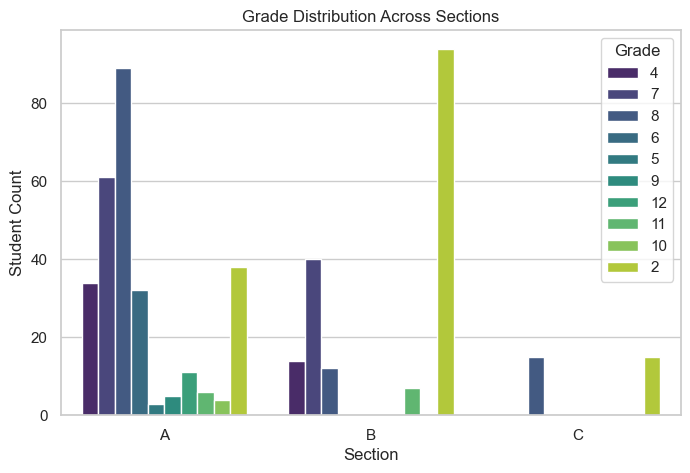

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

# 1. Performance Distribution Across Sections
plt.figure(figsize=(8, 5))
sns.countplot(x="Section", hue="Grade", data=study_data, palette="viridis")
plt.title("Grade Distribution Across Sections")
plt.xlabel("Section")
plt.ylabel("Student Count")
plt.legend(title="Grade")
plt.show()


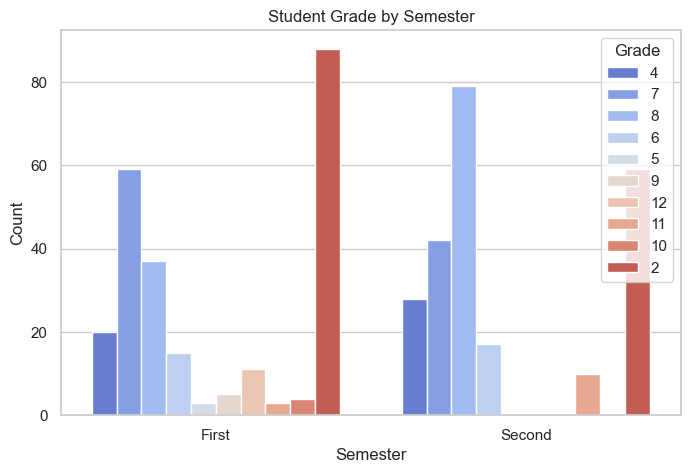

In [15]:
# 2. Performance vs. Semester
plt.figure(figsize=(8, 5))
sns.countplot(x="Semester", hue="Grade", data=study_data, palette="coolwarm")
plt.title("Student Grade by Semester")
plt.xlabel("Semester")
plt.ylabel("Count")
plt.legend(title="Grade")
plt.show()

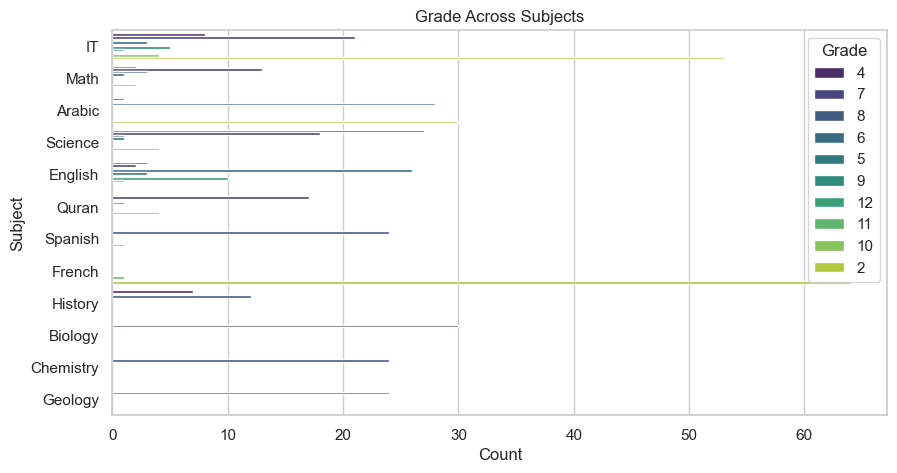

In [16]:
# 3. Subject-wise Performance
plt.figure(figsize=(10, 5))
sns.countplot(y="Subject", hue="Grade", data=study_data, palette="viridis")
plt.title("Grade Across Subjects")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.legend(title="Grade")
plt.show()

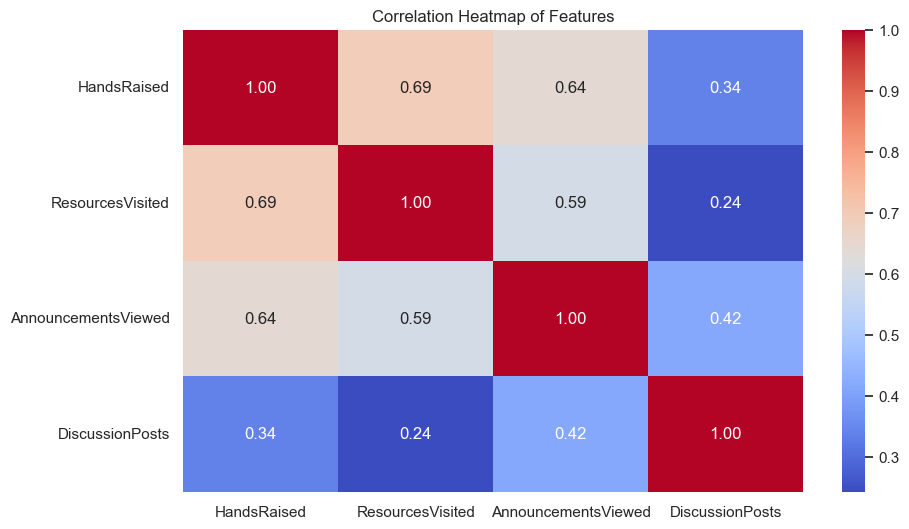

In [17]:
# 4. Heatmap of Numeric Features
plt.figure(figsize=(10, 6))
sns.heatmap(study_data.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [18]:
study_data.columns

Index(['Gender', 'Nationality', 'Education_Level', 'Grade', 'Section',
       'Subject', 'Semester', 'HandsRaised', 'ResourcesVisited',
       'AnnouncementsViewed', 'DiscussionPosts', 'ParentSurvey',
       'ParentSatisfaction', 'AbsenceDays_lessThan7', 'Performance'],
      dtype='object')

In [19]:
# check for missing values
study_data.isnull().sum()

Gender                   0
Nationality              0
Education_Level          0
Grade                    0
Section                  0
Subject                  0
Semester                 0
HandsRaised              0
ResourcesVisited         0
AnnouncementsViewed      0
DiscussionPosts          0
ParentSurvey             0
ParentSatisfaction       0
AbsenceDays_lessThan7    0
Performance              0
dtype: int64

In [20]:
# check for categorical columns
study_data.select_dtypes(include='object').columns

Index(['Gender', 'Nationality', 'Education_Level', 'Grade', 'Section',
       'Subject', 'Semester', 'ParentSurvey', 'ParentSatisfaction',
       'AbsenceDays_lessThan7', 'Performance'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Drop irrelevant columns (optional, based on feature importance)
drop_cols = ['Nationality', 'Section', 'Grade', 'Semester', 'ParentSurvey', 'HandsRaised', 'ResourcesVisited', 'AnnouncementsViewed', 'DiscussionPosts']
study_data.drop(columns=drop_cols, inplace=True)

# Label Encoding for categorical variables
categorical_cols = ['Gender', 'Education_Level', 'Subject','ParentSatisfaction',
                    'AbsenceDays_lessThan7']

In [22]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    study_data[col] = le.fit_transform(study_data[col])
    label_encoders[col] = le  # Save encoder for inverse transformation if needed later

In [23]:
'''
# Standardizing numerical features
num_cols = ['Gender', 'Education_Level','Subject', 'ParentSatisfaction',
                    'AbsenceDays_lessThan7']
scaler = StandardScaler()
study_data[num_cols] = scaler.fit_transform(study_data[num_cols])
'''

"\n# Standardizing numerical features\nnum_cols = ['Gender', 'Education_Level','Subject', 'ParentSatisfaction',\n                    'AbsenceDays_lessThan7']\nscaler = StandardScaler()\nstudy_data[num_cols] = scaler.fit_transform(study_data[num_cols])\n"

In [24]:
# Separate features (X) and target (y)
X = study_data.drop(columns=['Performance'])  # Features
y = study_data['Performance']  # Target


In [25]:
X.columns

Index(['Gender', 'Education_Level', 'Subject', 'ParentSatisfaction',
       'AbsenceDays_lessThan7'],
      dtype='object')

In [26]:
X.head()

,Gender,Education_Level,Subject,ParentSatisfaction,AbsenceDays_lessThan7
0,1,1,7,0,1
1,1,1,7,0,1
2,1,1,7,1,0
3,1,1,7,1,0
4,1,1,7,1,0


In [27]:
y.head()

0    M
1    M
2    L
3    L
4    M
Name: Performance, dtype: object

In [28]:
column_mapping = {
    'Education_Level': 'Education Level',
    'Subject': 'Subject',
    'ParentSatisfaction': 'Satisfaction',
    'AbsenceDays_lessThan7': 'Absences',
    'Gender': 'Gender'
}

X = X.rename(columns=column_mapping, inplace=True)

In [29]:
!pip install xgboost

In [40]:
data = pd.read_csv("data/cleaned/student-final-notprocessed.csv")  # Assuming your dataset file

In [ ]:
# Step 1: Calculate average_grade
data['average_grade'] = data[['grade_1', 'grade_2', 'G3']].mean(axis=1)

# Step 2: Drop grade_1 and grade_2
data = data.drop(columns=['grade_1', 'grade_2', 'G3'])

# Step 3: Define input and output features
input_features = ['gender', 'mother_job', 'father_job', 'internet', 'freetime', 'absences',
                  'school_support', 'family_support', 'extra_paid_class',
                  'extracurricular', 'higher_edu', 'romantic_rel']

X = data[input_features]
y = data['average_grade']

# Step 4: Preprocess categorical variables in X
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def train_and_evaluate_models(X, y):
    # Encode categorical target variable to start from 0
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  # Don't reshape or wrap into DataFrame

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # No reshaping needed
    }

    # Train and evaluate models
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

    return results

In [44]:
# Now call the fixed function
results = train_and_evaluate_models(X_encoded, y)
print(results)

c:\Users\bhavy\Desktop\learnsphere-hackomania\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]

In [ ]:
from sklearn.model_selection import GridSearchCV

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert H, L, M -> 0, 1, 2

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best accuracy: 0.6274436090225564


In [ ]:
X_train

,Gender,Education_Level,Subject,ParentSatisfaction,AbsenceDays_lessThan7
132,1,1,7,1,0
228,1,0,8,0,0
473,1,2,5,0,1
42,1,0,7,0,0
360,1,1,0,0,0
...,...,...,...,...,...
106,0,1,7,0,1
270,0,2,3,0,1
348,1,1,4,0,0
435,1,2,2,0,0


Original Class Distribution: Counter({2: 163, 0: 120, 1: 101})


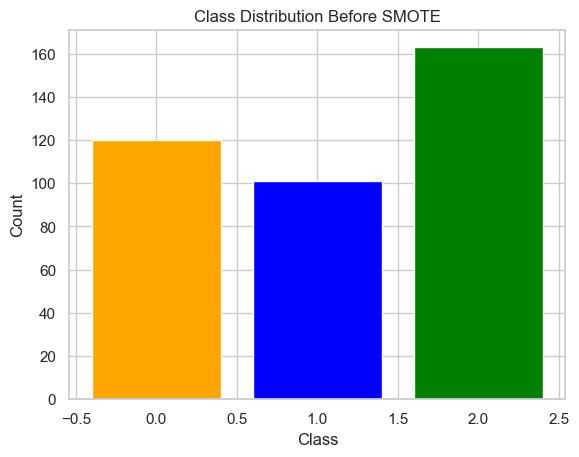

In [ ]:
from collections import Counter

# Check distribution
print("Original Class Distribution:", Counter(y_train))

# Plot class distribution
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), color=['blue', 'orange', 'green'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution Before SMOTE")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode categorical target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Convert ['H', 'M', 'L'] → [0, 1, 2]

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_encoded)

# Convert back to original labels
y_resampled = le.inverse_transform(y_resampled)

# Check new distribution
print("New Class Distribution:", Counter(y_resampled))

New Class Distribution: Counter({1: 163, 0: 163, 2: 163})


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train the model on resampled data
model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=200)
model.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after SMOTE:", accuracy)

Accuracy after SMOTE: 0.6666666666666666


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load your dataset (replace with actual data)
# Assuming X_resampled, y_resampled are obtained after applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Encode target variable if it's categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear"),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", learning_rate=0.1, max_depth=7, n_estimators=200)
}

# Train & evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train_encoded)  # Train model
    y_pred = model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test_encoded, y_pred)  # Evaluate accuracy
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Display final results
print("\nFinal Model Performance:")
print(results)


Logistic Regression Accuracy: 0.6531
Random Forest Accuracy: 0.6327
Support Vector Machine Accuracy: 0.6735
XGBoost Accuracy: 0.6531

Final Model Performance:
{'Logistic Regression': 0.6530612244897959, 'Random Forest': 0.6326530612244898, 'Support Vector Machine': 0.673469387755102, 'XGBoost': 0.6530612244897959}


c:\Users\bhavy\Desktop\learnsphere\backend\learnsphere\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:51:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
model = SVC(kernel="linear")    
model.fit(X_train, y_train_encoded)  # Train model
y_pred = model.predict(X_test)  # Predict
accuracy = accuracy_score(y_test_encoded, y_pred)  # Evaluate accuracy
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6735


In [ ]:
import pickle

with open("artifacts/best_model.pkl", "wb") as f:
    pickle.dump(model, f)  # trained_model should be a fitted model object

print("Model saved successfully!")

Model saved successfully!
